# Аналитика в авиакомпании

**ОПИСАНИЕ ПРОЕКТА**

<br>Необходимо проанализировать географию полетов по городам исходя из средних значений принимаемых рейсов в день в сентябре 2018 г. и парк самолетов компании исходя их количества рейсов для каждой модели в августе 2018 г.

**ОПИСАНИЕ ДАННЫХ**

<br>***/datasets/query_1.csv***
<br>*model* — модель самолета
<br>*flights_amount* — количество рейсов для каждой модели самолетов model в сентябре 2018 года

<br>***/datasets/query_3.csv***
<br>*city* — город
<br>*average_flights* — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года

## Импорт и изучение данных

In [19]:
# Импорт необходимых библиотек
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
cm = sns.light_palette("brown", as_cmap=True)

In [20]:
# Чтение данных
models = pd.read_csv('query_1.csv')
cities = pd.read_csv('query_3.csv')

In [21]:
# Описание данных 
models.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [22]:
# Просмотр таблицы моделей и количества рейсов
models

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [23]:
# Описание данных 
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [24]:
# Просмотр таблицы городов и среднего количества принимаемых рейсов
cities

,city,average_flights
0,Абакан,3.87
1,Анадырь,1.00
2,Анапа,2.16
3,Архангельск,5.35
4,Астрахань,2.45
...,...,...
96,Чита,1.58
97,Элиста,4.87
98,Южно-Сахалинск,4.29
99,Якутск,2.74


In [25]:
# Контроль пропущеных значений
pd.DataFrame(round((cities.isna().mean()*100),2)).style.background_gradient(cmap=cm)

,0
city,0.000000
average_flights,0.000000


Типы данных соответствуют логике, для названий моделей и городов - текст, для количества полетов - целочисленный, для среднего количества - дробный, пропуски отсутствуют.

## Города и среднее количество рейсов принятых в день в сентябре 2018 г.

In [26]:
# Описательные статистики по городам и среднему количеству рейсов
cities.describe()

,average_flights
count,101.00
mean,5.49
std,13.12
min,1.00
25%,2.00
50%,3.00
75%,5.87
max,129.77


Половина городов в среднем в день сентября 2018 г. принимала от 2 до 6 рейсов

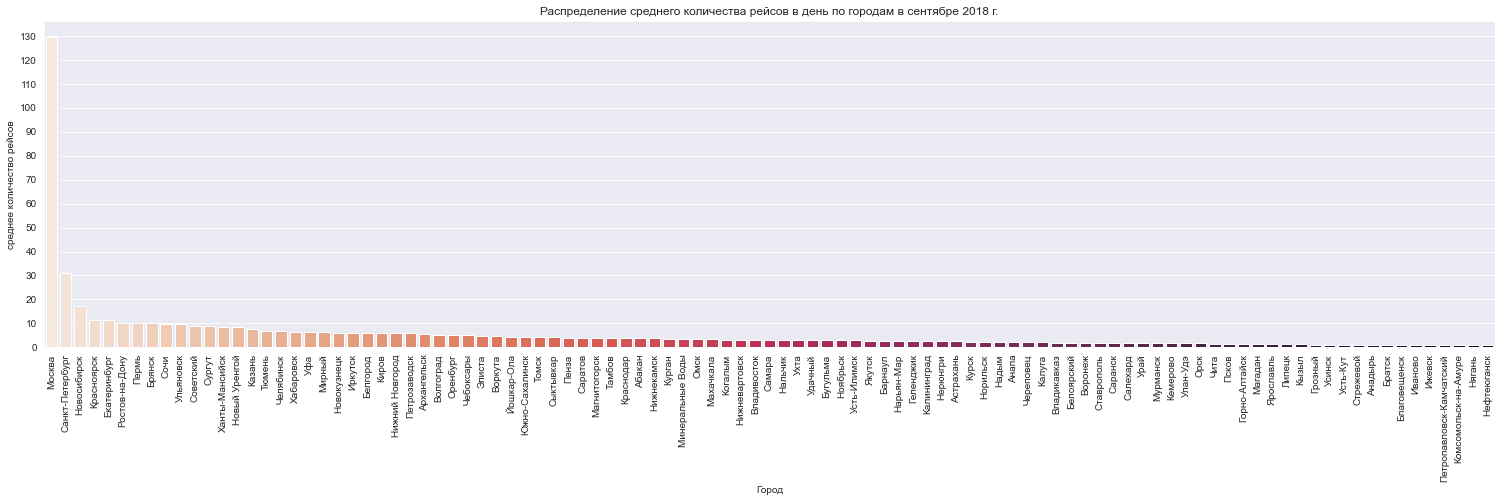

In [27]:
# График среднего количества рейсов по всем городам
fig, axes = plt.subplots(figsize=(26, 6))
sns.barplot(x='city', y='average_flights', data=cities.sort_values('average_flights', ascending=False), palette="rocket_r")
plt.title('Распределение среднего количества рейсов в день по городам в сентябре 2018 г.')
plt.xticks(rotation=90)
plt.yticks(np.arange(0,140,10))
plt.xlabel('Город')
plt.ylabel('среднее количество рейсов')
plt.show()

Явный лидер по принятым рейсам - Москва, общеросийский хаб, на несколько проядков ниже - Санкт-Петербург и Новосибирск. Три четверти городов в среднем принимают менее 6 рейсов в день. 

In [28]:
# Вывод Топ-10 городов по среднему количеству рейсов
top_cities = cities.sort_values('average_flights', ascending=False).reset_index(drop=True).head(10)
top_cities = top_cities.astype({'average_flights':'int64'})
top_cities.style.background_gradient(cmap=cm)

,city,average_flights
0,Москва,129
1,Санкт-Петербург,31
2,Новосибирск,17
3,Красноярск,11
4,Екатеринбург,11
5,Ростов-на-Дону,10
6,Пермь,10
7,Брянск,10
8,Сочи,9
9,Ульяновск,9


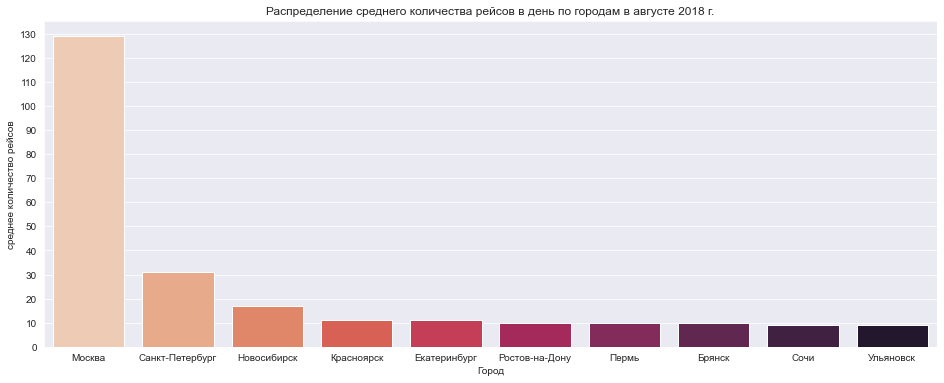

In [29]:
# График значений среднего количества рейсов по ТОП-10
fig, axes = plt.subplots(figsize=(16, 6))
sns.barplot(x='city', y='average_flights', data=top_cities, palette='rocket_r')
plt.title('Распределение среднего количества рейсов в день по городам в августе 2018 г.')
plt.yticks(np.arange(0,140,10))
plt.xlabel('Город')
plt.ylabel('среднее количество рейсов')
plt.show()

<br>В ТОП-10 городов по среднему количеству принимаемых рейсов в день, явный лидер - Москва, базовый город для большинства крупных авиакомпаний, второй - Санкт-Петербург имеющий свою базовую авиакомпанию и привлекающий туристический траффик, третий - Новосибирск, город-миллионник, транзитный хаб для азиатских и дальневосточных рейсов. Красноярск, Екатеринбург и Ростов-на-Дону - города миллионники. Сочи - крупнейший курорт.
<br>Сложно объяснить, вследствии недостаточности данных, попадание в топ небольшого Брянска, который находится менее чем в 400 км от Москвы, рядом с трассой М3 имеющий развитое жд сообщение.
<br>Несомненно что для любой авиакомпании - Москва приоритетное направление, как и Санкт-Петербург, самая популярная география полетов ближняя и средняя по дальности.

In [30]:
# Загрузка таблицы с расписанием фестивалей
festivals = pd.read_html('https://code.s3.yandex.net/learning-materials/data-analyst/festival_news/index.html', encoding='utf-8')
festivals = festivals[0]
festivals['Дата проведения'] = pd.to_datetime(festivals['Дата проведения'])
festivals.sort_values('Дата проведения').reset_index(drop=True)

,Название фестиваля,Место проведения,Дата проведения
0,Музыкальный фестиваль «Усадьба Jazz»,Екатеринбург,2018-01-07
1,"Фестиваль «О, да! Еда!»",Владивосток,2018-02-09
2,Пикник Афиши,Москва,2018-04-08
3,«Нашествие 2018»,Тверь,2018-05-08
4,"Фестиваль еды «О, да! Еда!»",Санкт-Петербург,2018-07-21
5,Park Live,Москва,2018-07-28
6,Доброфест,Ярославль,2018-07-29
7,VK FEST,Санкт-Петербург,2018-07-29
8,Видфест,Москва,2018-08-09
9,"Фестиваль «О, да! Еда!»",Иркутск,2018-08-25


Из расписания массовых мероприятий видно что в сентябре 2018 года - период за который взяты данные, фестивалей в городах из датафрейма не было, поэтому данные по принимаемым рейсам с большой вероятностью отражают регулярную картину.

Общий вывод по данным о городах и среднем количестве принимаемых рейсов:

Даже для компании не базирующеся в Москве, Москва - принципиально важное направление. Второе по значимости - Санкт-Петербург, дополнительно, города-миллионники и Сочи - хороший набор популярных направлений, существенно расширяющий географию полетов и повышающий привлекательность в глазах клиентов.

## Модели авиалайнеров и количество рейсов

In [31]:
# Вывод таблицы моделей авиалайнеров и количества рейсов
models

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


Исходя из аннотации к данным, речь идет о парке самолетов и количестве рейсов за август 2018г. Видно что по количеству рейсов парк делится на две группы - до 1000 полетов в месяц и более 4000 полетов в месяц. Возможно чуть детальнее сравнить данные.

In [32]:
# Добавление столбца с долей количества рейсов ждя каждой модели
models['pct'] = round(((models['flights_amount'] / models['flights_amount'].sum())*100),2)

In [33]:
# Категоризация моделей по бренду и дальности полета
models = models.sort_values('flights_amount', ascending=False)
def aitcraft_brand(brand_name):
        if brand_name in ["Airbus A319-100", "Airbus A321-200"]:
            return 'Airbus'
        if brand_name in ["Boeing 737-300", "Boeing 767-300", "Boeing 777-300"]:
            return 'Boeing'
        else:
            return 'Other'
models['brand'] = models['model'].apply(aitcraft_brand)
def aitcraft_range(range_type):
        if range_type in ["Boeing 767-300", "Boeing 777-300"]:
            return 'дальнемагистральный'
        if range_type in ["Airbus A319-100", "Airbus A321-200", "Sukhoi SuperJet-100", "Boeing 737-300"]:
            return 'среднемагистральный'
        else:
            return 'ближнемагистральный'
models['range_type'] = models['model'].apply(aitcraft_range)
models.reset_index(drop=True).style.background_gradient(cmap=cm)

,model,flights_amount,pct,brand,range_type
0,Cessna 208 Caravan,4557,27.980000,Other,ближнемагистральный
1,Bombardier CRJ-200,4446,27.300000,Other,ближнемагистральный
2,Sukhoi SuperJet-100,4185,25.700000,Other,среднемагистральный
3,Airbus A321-200,960,5.890000,Airbus,среднемагистральный
4,Boeing 737-300,630,3.870000,Boeing,среднемагистральный
5,Airbus A319-100,607,3.730000,Airbus,среднемагистральный
6,Boeing 767-300,600,3.680000,Boeing,дальнемагистральный
7,Boeing 777-300,300,1.840000,Boeing,дальнемагистральный


Лидер по количеству рейсов в парке авиакомпании не Boeing и Airbus а другие бренды.

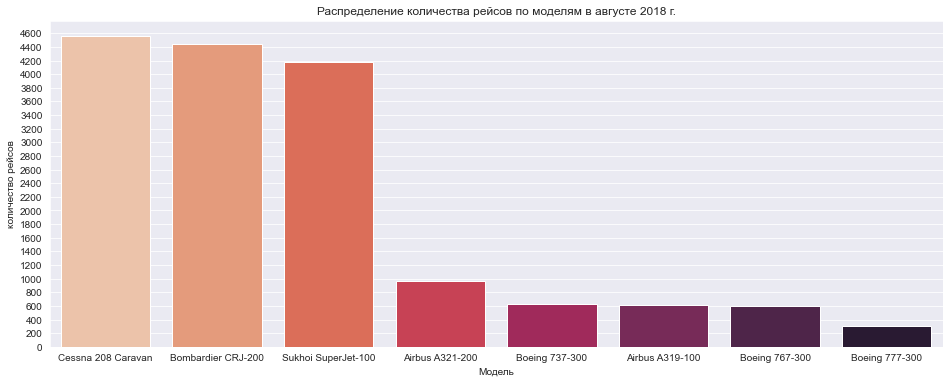

In [34]:
# График ззначений количества рейсов по моделям
fig, axes = plt.subplots(figsize=(16, 6))
sns.barplot(x='model', y='flights_amount', data=models, palette='rocket_r')
plt.title('Распределение количества рейсов по моделям в августе 2018 г.')
plt.yticks(np.arange(0,4800,200))
plt.xlabel('Модель')
plt.ylabel('количество рейсов')
plt.show()

График подтверждает вывод - Cessna, Bombardier и Sukhoi выполнили подовляющее большинство рейсов в августе - каждый по четверти от всего количества в месяц. Более половины рейсов компании в сентябре имеют ближню географию полетов. Лидер по полетам на средние растояния - Sukhoi SuperJet-100. Один из крупнейших гражданских лайнеров в мире Boeing 777-300 выполняет меньше всех рейсов, что логично т.к. он используется на дальних рейсах.

In [35]:
# Группировка по бредами и дальности полета
models_brand = models.groupby('brand')['flights_amount'].agg(flights_amount='sum').reset_index()
models_range = models.groupby('range_type')['flights_amount'].agg(flights_amount='sum').reset_index()

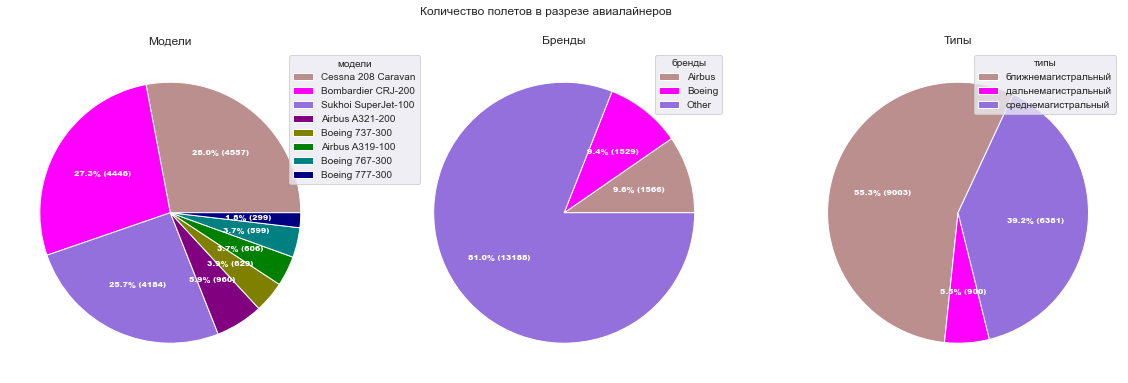

In [36]:
# Визуализация долей по моделям, бренду и дальности полета
fig, ax = plt.subplots(1,3, figsize=(20, 6))
fig.suptitle('Количество полетов в разрезе авиалайнеров')
data1, categories1 = models['flights_amount'], models['model']
data2, categories2 = models_brand['flights_amount'], models_brand['brand']
data3, categories3 = models_range['flights_amount'], models_range['range_type']
colors = ['#bc8f8f','#ff00ff','#9370DB','#800080','#808000', '#008000', '#008080', '#000080']
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d})".format(pct, absolute)
wedges, texts, autotexts = ax[0].pie(data1 ,autopct=lambda pct: func(pct, data1), textprops=dict(color="w"), colors=colors)
ax[0].set_title("Модели")
ax[0].legend(wedges, categories1, title="модели", loc="upper left", bbox_to_anchor=(0.85, 1))
plt.setp(autotexts, size=8, weight=850)
wedges, texts, autotexts = ax[1].pie(data2 ,autopct=lambda pct: func(pct, data2), textprops=dict(color="w"),colors=colors)
ax[1].set_title("Бренды")
ax[1].legend(wedges, categories2, title="бренды", loc="upper right")
plt.setp(autotexts, size=8, weight=850)
wedges, texts, autotexts = ax[2].pie\
(data3 ,autopct=lambda pct: func(pct, data3), startangle = 65, textprops=dict(color="w"),colors=colors)
ax[2].set_title("Типы")
ax[2].legend(wedges, categories3, title="типы", loc="upper right")
plt.setp(autotexts, size=8, weight=850)
plt.show() 

Ближнемагистральные самолеты компании - миниатюрная Cessna и 50 местный Bombardier - лидер по количеству рейсов, дальнемагистральные Boeing - летали реже всех.

In [37]:
# Значения долей по бренду
models.groupby('brand')['pct'].agg(
    pct='sum').sort_values('pct', ascending=False).reset_index().style.background_gradient(cmap=cm)              

,brand,pct
0,Other,80.980000
1,Airbus,9.620000
2,Boeing,9.390000


Лишь один из десяти самолетов компании в воздухе в сентябре мог оказаться AirBus или Boeing

In [38]:
# Значения долей по дальности полета
models.groupby('range_type')['pct'].agg(
    pct='sum').sort_values('pct', ascending=False).reset_index().style.background_gradient(cmap=cm)

,range_type,pct
0,ближнемагистральный,55.280000
1,среднемагистральный,39.190000
2,дальнемагистральный,5.520000


Ближнемагистральные (до 2500 км) самолеты компании осуществили более половины рейсов в сентябре. И лишь каждый двадцатый рейс был выполнен дальнемагистральным (от 6000 км) лайнером. Подавляющее число географических направлений полетов компании в сентябре - не далее 5-6 тыс. км

In [39]:
# Распределение парка по дальности полета и брендам
pd.crosstab(models.range_type, models.brand,margins=True).style.background_gradient(cmap=cm)

brand,Airbus,Boeing,Other,All
range_type,,,,
ближнемагистральный,0,0,2,2
дальнемагистральный,0,2,0,2
среднемагистральный,2,1,1,4
All,2,3,3,8


Для всех дальних рейсов в компании используют Boeing, для полетов средней дальности - Airbus и Sukhoi. Возможно парк Sukhoi по количеству лайнеров превышает AirBus и Boeing.

## Общий вывод:

<br>География полетов авиакомпании в РФ, исходя из представленных данных должна покрывать наиболее популярные направления кроме Москвы, Санкт-Петербург как крупнейший туристический центр и города милионники, как крупнейшие популяции страны, важны рейсы в город курорт Сочи, особенно в сентябре, в "бархатный сезон". Пермь может быть популярна для ближних рейсов в силу географии и слабой доступности многих населенных пунктов обширного Пермского края.
<br>Существующий парк авиакомпании нацелен прежде всего на ближнемагистральные - до 2,5 тыс км перевозки, они состовляют более 50% рейсов, далее - среднемагистральные перевозки до 6 тыс. км - 39%. Такая география покрывает, при базировании в Москве большинство популярных направлений, которые обеспечивают Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi SuperJet-100, реже - среднемагистральные модели Airbus.